Langkah awal *import* library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Memasukan data Penjualan_Mobil

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Penjualan_Mobil.xlsx to Penjualan_Mobil (1).xlsx


In [ ]:
import io
df=pd.read_excel(io.BytesIO(uploaded['Penjualan_Mobil.xlsx']))
df[0:5]

,BiayaPerawatan,Kapasitas,UkuranBagasi,Keamanan,StatusTerjual
0,0,0,2,2,Gagal
1,0,0,2,0,Gagal
2,0,0,2,1,Gagal
3,0,0,1,2,Gagal
4,0,0,1,0,Gagal


Tahapan *data preprocessing*, kemudian tentukan nilai X dan Y


In [ ]:
X = df[['BiayaPerawatan', 'Kapasitas', 'UkuranBagasi', 'Keamanan']].values
X[0:5]

array([[0, 0, 2, 2],
       [0, 0, 2, 0],
       [0, 0, 2, 1],
       [0, 0, 1, 2],
       [0, 0, 1, 0]])

In [ ]:
y = df["StatusTerjual"]
y[0:5]

0    Gagal
1    Gagal
2    Gagal
3    Gagal
4    Gagal
Name: StatusTerjual, dtype: object

*Spliting dataset*

In [ ]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
X_trainset

array([[1, 1, 0, 1],
       [1, 1, 0, 0],
       [1, 1, 1, 0],
       [2, 2, 2, 1],
       [0, 2, 2, 1],
       [2, 2, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 0],
       [2, 0, 0, 1],
       [0, 1, 2, 1],
       [2, 1, 2, 2],
       [2, 2, 1, 2],
       [0, 1, 2, 1],
       [2, 1, 2, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 2, 1],
       [0, 1, 2, 2],
       [1, 0, 1, 2],
       [1, 2, 0, 0],
       [2, 1, 0, 0],
       [2, 0, 1, 0],
       [1, 1, 2, 0],
       [2, 1, 2, 1],
       [1, 0, 2, 1],
       [2, 1, 2, 2],
       [1, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 2, 2, 0],
       [1, 0, 2, 2],
       [1, 1, 1, 2],
       [0, 2, 2, 2],
       [2, 0, 2, 0],
       [1, 0, 2, 1],
       [2, 1, 0, 1],
       [0, 0, 0, 0],
       [1, 2, 0, 2],
       [2, 1, 1, 2],
       [1, 2, 1, 0],
       [2, 0, 2, 2],
       [2, 1, 2, 1],
       [0, 2, 1, 1],
       [2, 0, 0, 2],
       [0, 0, 0, 0],
       [2, 2, 0, 0],
       [1, 1, 2, 2],
       [0, 1,

*Model fitting*

In [ ]:
statusTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
statusTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

*Prediction*

In [ ]:
predTree = statusTree.predict(X_testset)

In [ ]:
print (X_testset [0:5])

[[1 1 1 2]
 [1 1 1 2]
 [0 0 0 2]
 [0 0 1 1]
 [1 2 2 2]]


In [ ]:
print (predTree [0:5])

['Berhasil' 'Berhasil' 'Gagal' 'Gagal' 'Berhasil']


In [ ]:
predTree = statusTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['Berhasil' 'Berhasil' 'Gagal' 'Gagal' 'Berhasil']
104    Berhasil
101    Berhasil
6         Gagal
5         Gagal
91     Berhasil
Name: StatusTerjual, dtype: object


*Model evaluation*

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy; ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy;  0.8181818181818182


*Model visualization*

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


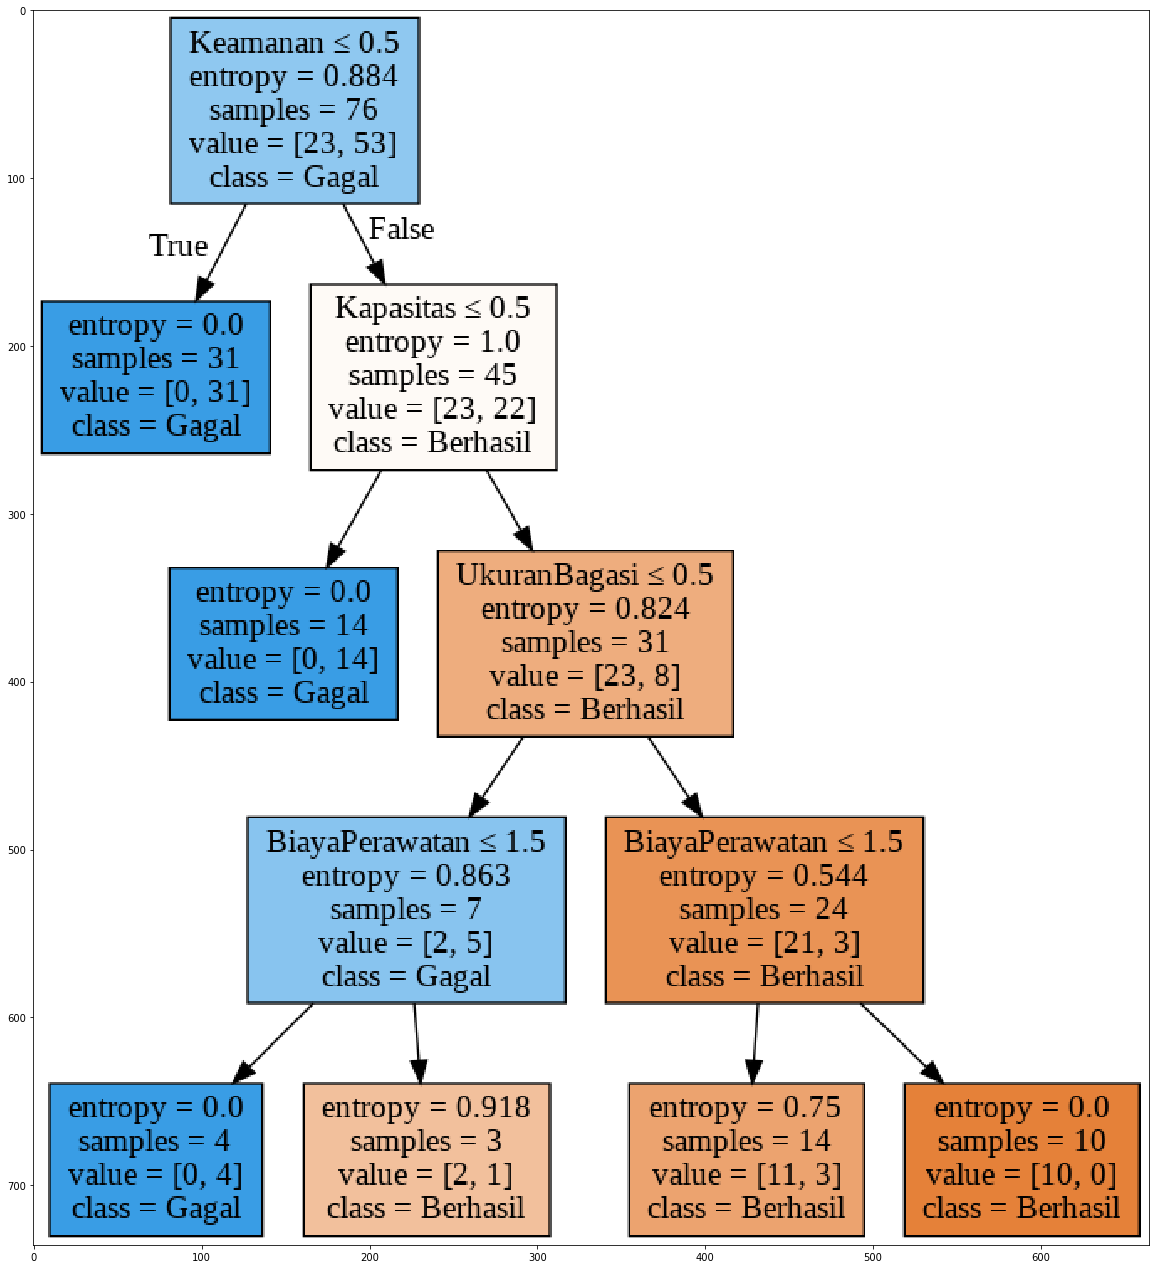

In [ ]:
dot_data = StringIO()
filename = "Hasil.png"
featureNames = df.columns[0:4]
targetNames = df["StatusTerjual"].unique().tolist()
out=tree.export_graphviz(statusTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 60))
plt.imshow(img,interpolation='nearest')